In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from pylab import*
import scipy.stats
#from scipy.special import gamma
import seaborn as sns
from scipy.stats import beta
from scipy.stats import spearmanr

<span style="color:blue"> Pregunta 2 </span>

1-Obtener el error estandar de la correlacion y mostrar para que N es mejor la precisión con respecto a la correlación de la muestra total.

2- Grafique los histogramas de las correlaciones.

3- Grafique el  histograma pero sobre una muestra bostrap considerando la muestra completa.

4- Tambien realizarlo con n-1(14).

In [221]:
#Cargamos la basse de las escuelas

ruta= "/Users/ignam/Documents/Semestre7/MachineLearning/MachineLearningEquipo/Tarea1/base_tarea1/"
escuelas= 'data_schools.csv'

bd_escuelas= pd.read_csv(ruta+escuelas)

In [220]:
#Seleccionamos aleatoriamente 15 escuelas
escuelas_random=bd_escuelas.sample(n=15, random_state=9998) [["escuela"]]
escuelas_random ["indicador"]=1

In [148]:
#Correlacion de los 82 datos
corr_datos_total = spearmanr(bd_escuelas.LSAT, bd_escuelas.GPA)[0]
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.753


***************************************************************************************************************************
***************************************************************************************************************************

# <span style="color:blue"> Muestras tamaño 15 </span>

Describiremos el proceso para resolver el ejercicio:

1- Construimos una funcion que nos permitiera poner como parametro el numero de simulaciones(N) que quiere el usuario, con muestras de tamaño 15, y nos devuelve un DataFrame con las correlaciones por cada simulación.

2- Después construimos el **histograma de las correlaciones**, obtenidas con el DataFrame que nos regresa la funcion anterior.

3- Para **determinar la mejor N** hicimos simulaciones con diferentes N, en este caso tomamos un intervalo de (1,200), filtramos por los más parecidos con la correlación de la muestra completa(esta idea se explica más a fondo en su seccion correspondiente).

4- Después creamos una función para encontrar los errrores estandar, tomando como parámetro la N(número de simulaciones), y nos devuleve el error estandar.  

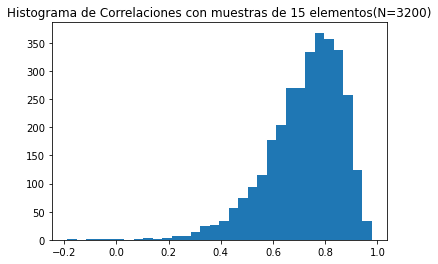

In [222]:
#Crearemos una funcion que tenga como parametro el numero de simulaciones(N), con 15 elementos
#Y nos devuleva los coeficientes de correlacion de cada simulacion

def correlacion_15(n):
    
    random_walk = []
    for i in range(1,n):
        
        erandom=bd_escuelas.sample(n=15, replace=True) [["escuela"]]
    
        escuelas_comple = pd.merge(bd_escuelas,erandom, on=['escuela'],how='inner')
    
        corr_erandom = spearmanr(escuelas_comple.LSAT, escuelas_comple.GPA)[0]
    
        random_walk.append(corr_erandom)
        
    random_walk = pd.DataFrame(random_walk,columns=['Correlaciones'])
        
    return(random_walk)


plt.hist(correlacion_15(3200),bins=32)
plt.title('Histograma de Correlaciones con muestras de 15 elementos(N=3200)')
plt.show()

In [203]:
medias_15=pd.DataFrame(columns=['N','media'])
for i in range(1,200):
    m=(correlacion_15(i).Correlaciones).mean()
    medias_15=medias_15.append(pd.DataFrame([[i,m]],columns=['N','media']),ignore_index = True)

In [204]:
medias_15.head()

,N,media
0,1,NaN
1,2,0.763663
2,3,0.788237
3,4,0.633968
4,5,0.784508


In [218]:
medias_15_m=medias_15[medias_15['media']>0.75]
medias_15_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 1 to 117
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       15 non-null     object 
 1   media   15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 360.0+ bytes


In [219]:
medias_15_m=medias_15_m[medias_15_m['media']<0.76]
medias_15_m

,N,media
10,11,0.754949
33,34,0.752767
54,55,0.751073
59,60,0.755331
74,75,0.751124
84,85,0.751581
117,118,0.750135


----------------------------------------------------------------------------------------------------------------------------
¿Cual N nos mejora la precisión?

Tomamos la media de los coeficientes de correlacion para N en (1,200), y estos los metimos dentro de un dataframe.

A su vez lo filtramos tomando en cuenta el coeficiente de correlacion de la muestra total (0.753), este filtro consistio en tomar las media que fueran mayores a 0.75 y menores a 0.76, obteniendo los mas cercanos al coeficiente de correlacion original.

Y nos damos cuenta que para la muestra que realizamos el que mas se acerca es una N= 60, sin embargo esta puede cambiar dependiendo el muestreo que se tome, pues en nuestro ejercicio tomamos 15 elementos aleatorios de los 82 datos.

-----------------------------------------------------------------------------------------------------------------------------

In [155]:
#La siguiente funcion nos entrega el error estandar de muestrear i(N) veces, con 15 elementos de la tabla.

def errores_est(i):
    errores_estandar=pd.DataFrame(columns=['N','error'])
    
    #Ejecutamos la funcion que antes creamos
    df_aux=correlacion_15(i)
    
    #Obtenemos el error estandar para cada simulacion de N
    x_n=df_aux[["Correlaciones"]].to_numpy().reshape(-1)
    media= df_aux.Correlaciones.mean()
        
    den=sum((x_n - media)**2)
    #num=sum((x_n**2)/(i))
    err=np.sqrt(den/(i-1))
    errores_estandar=errores_estandar.append(pd.DataFrame([[i,err]],columns=['N','error']),ignore_index = True)
    
    return(errores_estandar)    

In [144]:
#Esto es algo extra

tabla_errores= pd.DataFrame(columns=['N','error'])
for i in range(2000,3300,100):
    tabla_errores=tabla_errores.append(errores_est(i),ignore_index = True)

In [145]:
tabla_errores.head()

,N,error
0,2000,0.148847
1,2100,0.144323
2,2200,0.137002
3,2300,0.144996
4,2400,0.142486


***************************************************************************************************************************
***************************************************************************************************************************
# <span style="color:blue"> Muestras tamaño 82 (completa) </span>

Para esta parte de la pregunta relaizamos de manera similar lo del inciso anterior, solo con la diferencia que no encontramos la N que mejorará el proceso y las muestras fueron con la muestra completa, es decir, con muestras de tamaño 82.

In [150]:
def correlacion_82(n):
    
    random_walk = []
    for i in range(1,n):
        
        erandom=bd_escuelas.sample(n=82, replace=True) [["escuela"]]
    
        escuelas_comple = pd.merge(bd_escuelas,erandom, on=['escuela'],how='inner')
    
        corr_erandom = spearmanr(escuelas_comple.LSAT, escuelas_comple.GPA)[0]
    
        random_walk.append(corr_erandom)
        
    random_walk = pd.DataFrame(random_walk,columns=['Correlaciones'])
        
    return(random_walk)

In [151]:
correlacion_82(200).Correlaciones[1]

0.8227987243463981

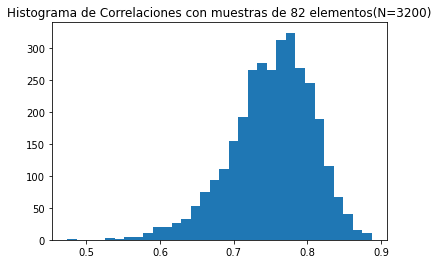

In [152]:
plt.hist(correlacion_82(3200),bins=32)
plt.title('Histograma de Correlaciones con muestras de 82 elementos(N=3200)')
plt.show()

In [156]:
#La siguiente funcion nos entrega el error estandar de muestrear i(N) veces, con 82 elementos de la tabla.

def errores_est_82(i):
    errores_estandar=pd.DataFrame(columns=['N','error'])
    
    #Ejecutamos la funcion que antes creamos
    df_aux=correlacion_82(i)
    
    #Obtenemos el error estandar para cada simulacion de N
    x_n=df_aux[["Correlaciones"]].to_numpy().reshape(-1)
    media= df_aux.Correlaciones.mean()
        
    den=sum((x_n - media)**2)
    #num=sum((x_n**2)/(i))
    err=np.sqrt(den/(i-1))
    errores_estandar=errores_estandar.append(pd.DataFrame([[i,err]],columns=['N','error']),ignore_index = True)
    
    return(errores_estandar)    

In [157]:
tabla_errores82= pd.DataFrame(columns=['N','error'])
for i in range(2000,3300,100):
    tabla_errores82=tabla_errores82.append(errores_est(i),ignore_index = True)

In [158]:
tabla_errores82.head()

,N,error
0,2000,0.150319
1,2100,0.142599
2,2200,0.151265
3,2300,0.145051
4,2400,0.146615


***************************************************************************************************************************
***************************************************************************************************************************

# <span style="color:blue"> Muestras tamaño 14 (n-1) </span>

Para esta parte de la pregunta relaizamos de manera similar lo del inciso anterior, solo con la diferencia que no encontramos la N que mejorará el proceso y las muestras fueron de tamaño 14.

In [167]:
def correlacion_14(n):
    
    random_walk = []
    for i in range(1,n):
        
        erandom=bd_escuelas.sample(n=14, replace=True) [["escuela"]]
    
        escuelas_comple = pd.merge(bd_escuelas,erandom, on=['escuela'],how='inner')
    
        corr_erandom = spearmanr(escuelas_comple.LSAT, escuelas_comple.GPA)[0]
    
        random_walk.append(corr_erandom)
        
    random_walk = pd.DataFrame(random_walk,columns=['Correlaciones'])
        
    return(random_walk)

In [168]:
correlacion_14(200).Correlaciones[1]

0.7202660644174593

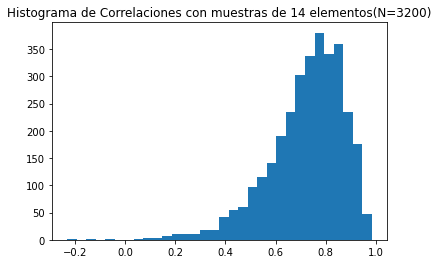

In [169]:
plt.hist(correlacion_14(3200),bins=32)
plt.title('Histograma de Correlaciones con muestras de 14 elementos(N=3200)')
plt.show()

In [170]:
#La siguiente funcion nos entrega el error estandar de muestrear i(N) veces, con 81 elementos de la tabla.

def errores_est_14(i):
    errores_estandar=pd.DataFrame(columns=['N','error'])
    
    #Ejecutamos la funcion que antes creamos
    df_aux=correlacion_14(i)
    
    #Obtenemos el error estandar para cada simulacion de N
    x_n=df_aux[["Correlaciones"]].to_numpy().reshape(-1)
    media= df_aux.Correlaciones.mean()
        
    den=sum((x_n - media)**2)
    #num=sum((x_n**2)/(i))
    err=np.sqrt(den/(i-1))
    errores_estandar=errores_estandar.append(pd.DataFrame([[i,err]],columns=['N','error']),ignore_index = True)
    
    return(errores_estandar)    

In [172]:
tabla_errores14= pd.DataFrame(columns=['N','error'])
for i in range(10,300,10):
    tabla_errores14=tabla_errores14.append(errores_est(i),ignore_index = True)

In [173]:
tabla_errores14.head()

,N,error
0,10,0.144278
1,20,0.120405
2,30,0.138667
3,40,0.166654
4,50,0.124150
